In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
data_dir = os.getcwd()
tables = {}

In [3]:
#data_dir = os.getcwd()
#tables = os.listdir(data_dir)
#print("Files in %r: %s" % (data_dir, tables))

Files in 'D:\\Code\\DSPE\\LR': ['.ipynb_checkpoints', 'heat.csv', 'HS1_G1.csv', 'HS1_G2.csv', 'HS1_P1.csv', 'HS1_P2.csv', 'HS1_T1.csv', 'HS1_T2.csv', 'HS2_G1.csv', 'HS2_G2.csv', 'HS2_P1.csv', 'HS2_P2.csv', 'HS2_T1.csv', 'HS2_T2.csv', 'HS3_G1.csv', 'LR test.ipynb', 'LR Workshop.ipynb', 'node1_T1.csv', 'node2_T1.csv', 'node3_T1.csv', 'W12data.7z']


In [3]:
list(os.listdir(data_dir))

['.ipynb_checkpoints',
 'heat.csv',
 'HS1_G1.csv',
 'HS1_G2.csv',
 'HS1_P1.csv',
 'HS1_P2.csv',
 'HS1_T1.csv',
 'HS1_T2.csv',
 'HS2_G1.csv',
 'HS2_G2.csv',
 'HS2_P1.csv',
 'HS2_P2.csv',
 'HS2_T1.csv',
 'HS2_T2.csv',
 'HS3_G1.csv',
 'LR Workshop.ipynb',
 'node1_T1.csv',
 'node2_T1.csv',
 'node3_T1.csv',
 'W12data.7z']

In [4]:
for f in list(os.listdir(data_dir)):
    if f[-4:] == ".csv":
        if pd.read_csv(f, sep=',').shape[1] > pd.read_csv(f, sep=';').shape[1]:
            tables[f[:-4]] = pd.read_csv(f, sep=',', names=['time',f[0:-4]])
        else:
            tables[f[:-4]] = pd.read_csv(f, sep=';', names=['time',f[0:-4]])  

In [5]:
tables

{'heat':                       time         heat
 0      2015-06-01 02:00:00   910.344750
 1      2015-06-01 03:00:00   859.474054
 2      2015-06-01 04:00:00   882.489646
 3      2015-06-01 05:00:00   932.948964
 4      2015-06-01 06:00:00   990.662728
 ...                    ...          ...
 24428  2018-03-16 00:00:00  4983.187094
 24429  2018-03-16 01:00:00  4436.284389
 24430  2018-03-16 02:00:00  3979.958712
 24431  2018-03-16 03:00:00  3621.024717
 24432  2018-03-16 04:00:00  3284.236790
 
 [24433 rows x 2 columns],
 'HS1_G1':                       time        HS1_G1
 0      2014-01-01 05:00:00  16447.303810
 1      2014-01-01 06:00:00  16537.577143
 2      2014-01-01 07:00:00  16445.183810
 3      2014-01-01 08:00:00  16362.103810
 4      2014-01-01 09:00:00  15919.877143
 ...                    ...           ...
 36639  2018-03-07 19:00:00  22302.166981
 36640  2018-03-07 20:00:00  22152.534491
 36641  2018-03-07 21:00:00  22099.938270
 36642  2018-03-07 22:00:00  21738.397365

In [6]:
tables.keys()

dict_keys(['heat', 'HS1_G1', 'HS1_G2', 'HS1_P1', 'HS1_P2', 'HS1_T1', 'HS1_T2', 'HS2_G1', 'HS2_G2', 'HS2_P1', 'HS2_P2', 'HS2_T1', 'HS2_T2', 'HS3_G1', 'node1_T1', 'node2_T1', 'node3_T1'])

In [7]:
for key,df in tables.items():
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
    df.index = df['time']
    df.drop('time',axis=1,inplace=True)

In [8]:
data = pd.DataFrame()

for key,df in tables.items():
    df = df.groupby(df.index).first()
    data = data.join(df, how='outer')
    print(key, df.shape, data.shape)

heat (24433, 1) (24433, 1)
HS1_G1 (36643, 1) (36840, 2)
HS1_G2 (36643, 1) (36840, 3)
HS1_P1 (36643, 1) (36840, 4)
HS1_P2 (36643, 1) (36840, 5)
HS1_T1 (36643, 1) (36840, 6)
HS1_T2 (36643, 1) (36840, 7)
HS2_G1 (36643, 1) (36840, 8)
HS2_G2 (36643, 1) (36840, 9)
HS2_P1 (36643, 1) (36840, 10)
HS2_P2 (36643, 1) (36840, 11)
HS2_T1 (36643, 1) (36840, 12)
HS2_T2 (36643, 1) (36840, 13)
HS3_G1 (36647, 1) (36844, 14)
node1_T1 (24687, 1) (37084, 15)
node2_T1 (24668, 1) (37084, 16)
node3_T1 (24687, 1) (37084, 17)


In [9]:
data.head(5)

,heat,HS1_G1,HS1_G2,HS1_P1,HS1_P2,HS1_T1,HS1_T2,HS2_G1,HS2_G2,HS2_P1,HS2_P2,HS2_T1,HS2_T2,HS3_G1,node1_T1,node2_T1,node3_T1
time,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.907377,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.907377,NaN,NaN,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.907377,NaN,NaN,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.907377,NaN,NaN,NaN
2014-01-01 05:00:00,NaN,16447.30381,16399.325036,1.279833,0.153203,84.859847,39.31778,12171.048344,12012.080217,1.253798,0.11,85.815553,38.300996,-5.907377,NaN,NaN,NaN


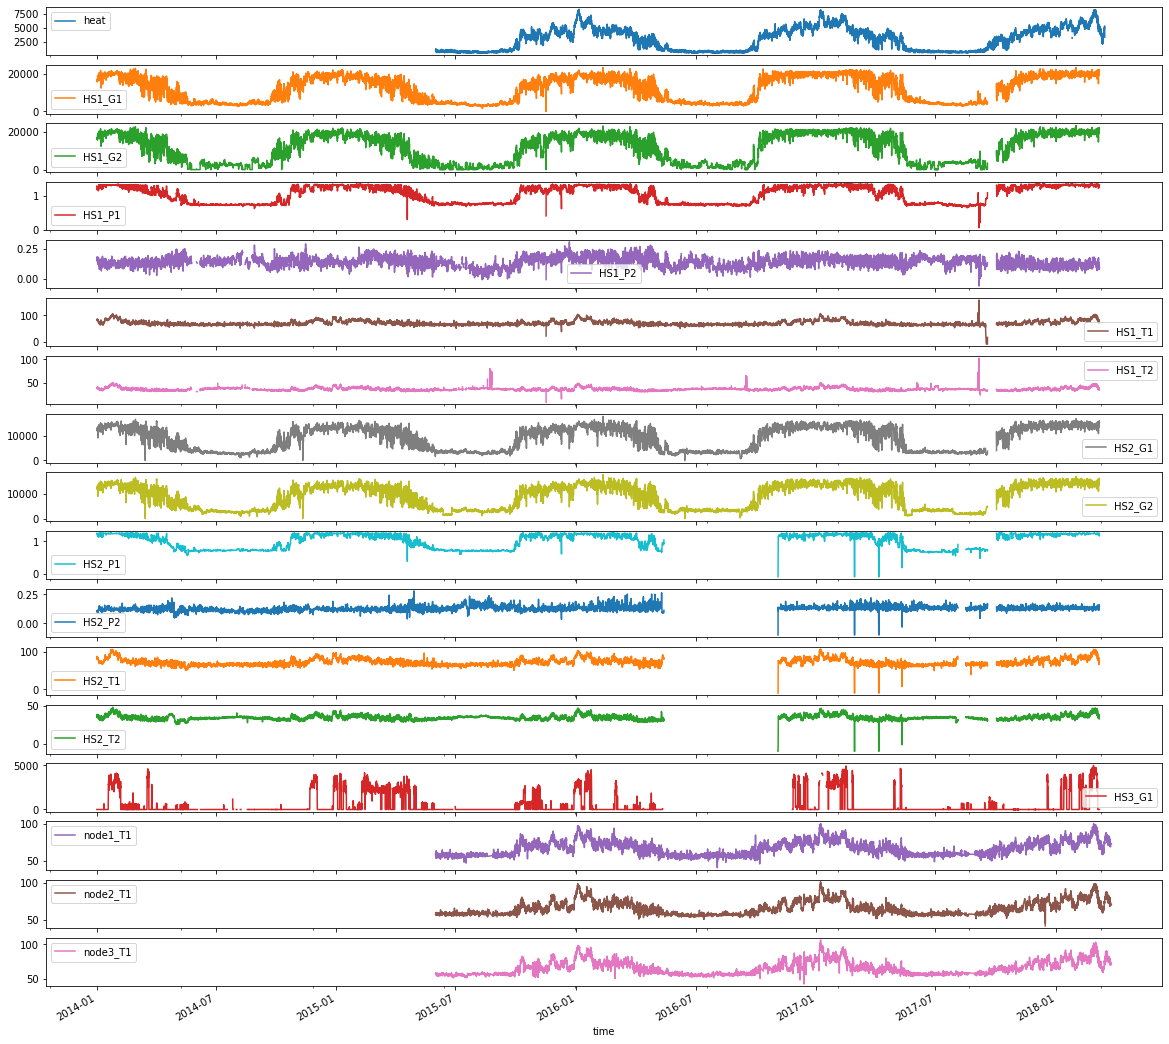

In [10]:
data.plot(subplots=True, figsize=(20,20))
plt.show()

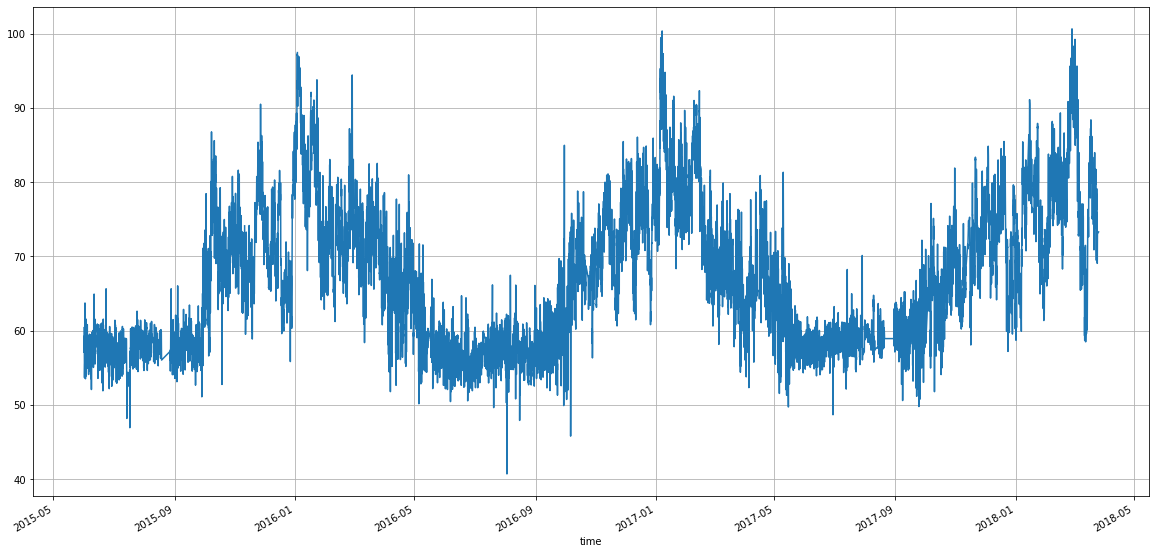

In [11]:
plt.figure(figsize=(20,10))
data['node1_T1'].plot()
plt.grid()

In [12]:
data1 = data.copy()
data1.loc[data['HS1_T1']<50,'HS1_T1'] = np.nan
data1.loc[data['HS1_T1']>110,'HS1_T1'] = np.nan

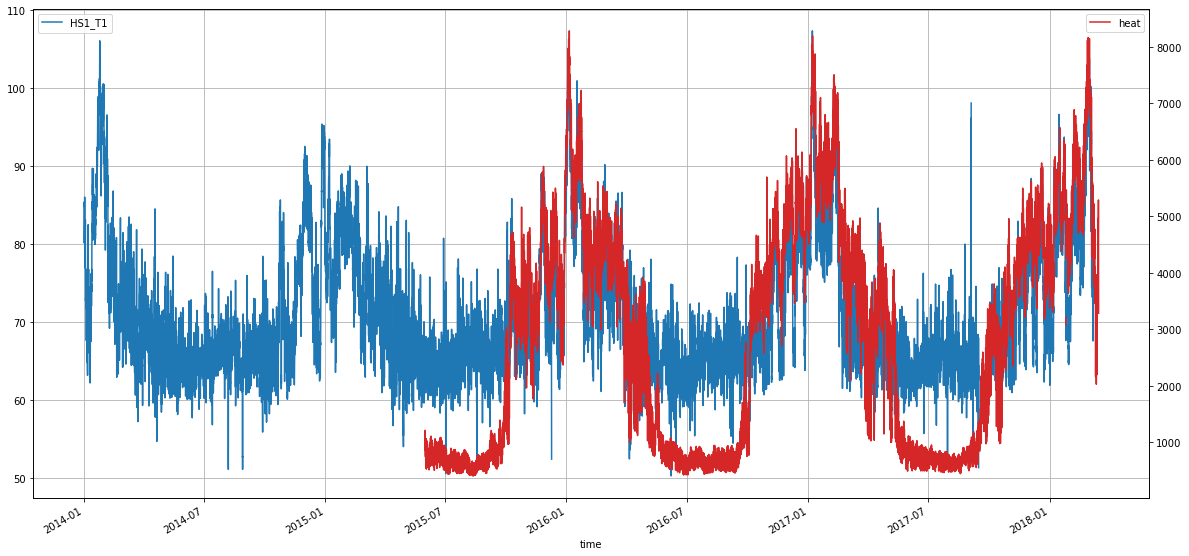

In [13]:
plt.figure(figsize=(20,10))
data1['HS1_T1'].plot()
plt.grid()
plt.legend(loc='upper left');
plt.twinx();
data1['heat'].plot(color='tab:red');
plt.legend();

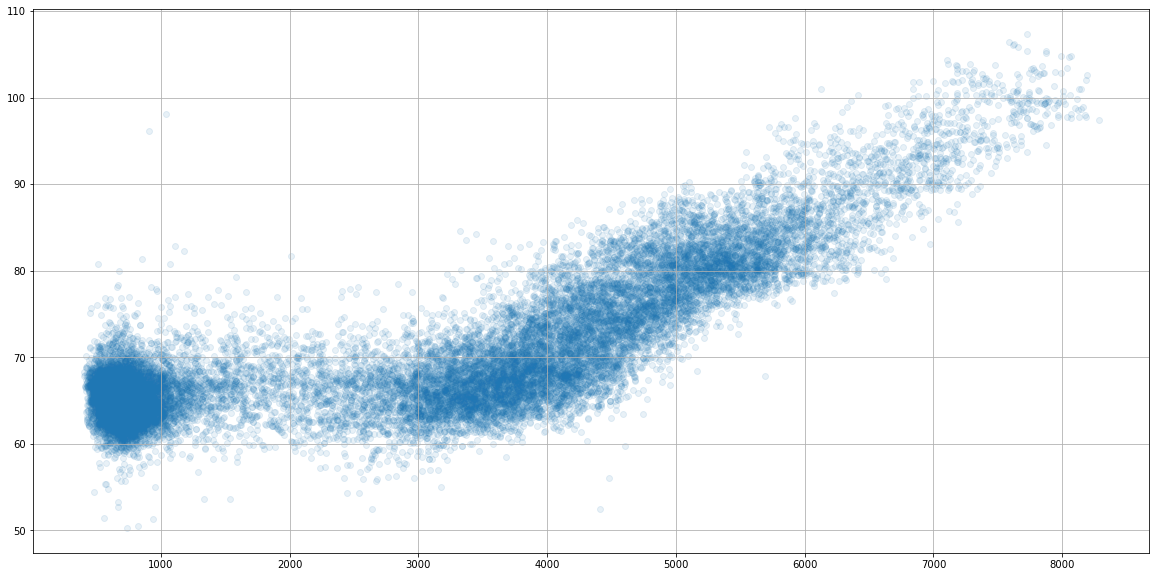

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(data1['heat'],data1['HS1_T1'], alpha=0.1) #alpha to see density of points
plt.grid()

In [15]:
#model to build when heat source is not working
#model is statistical when working correctly, so filter outliers
data1 = data.copy()

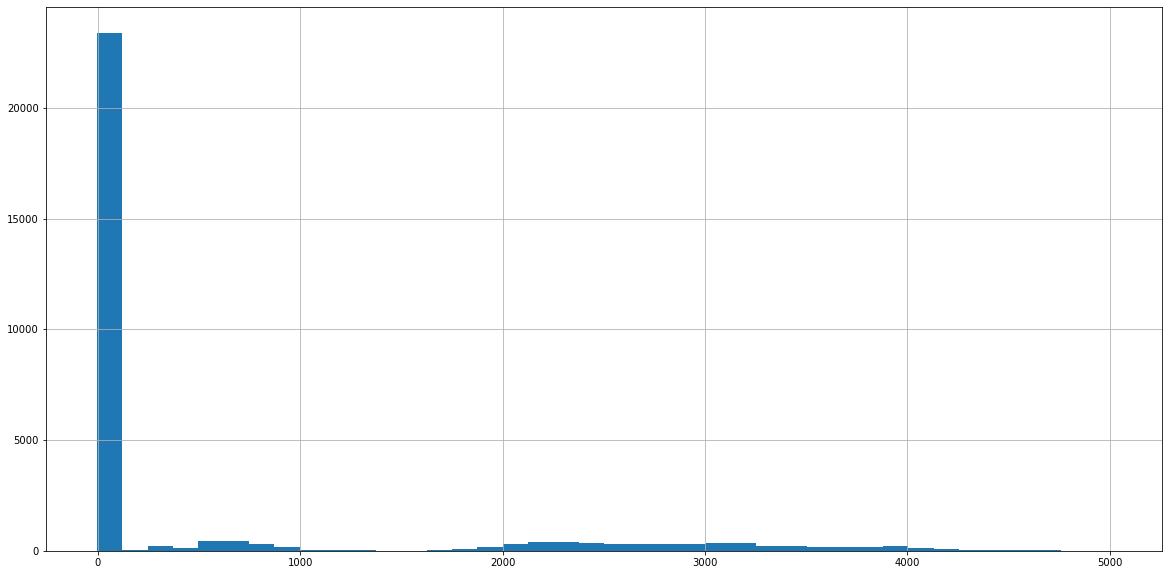

In [16]:
plt.figure(figsize=(20,10))
data1['HS3_G1'].hist(bins=40);

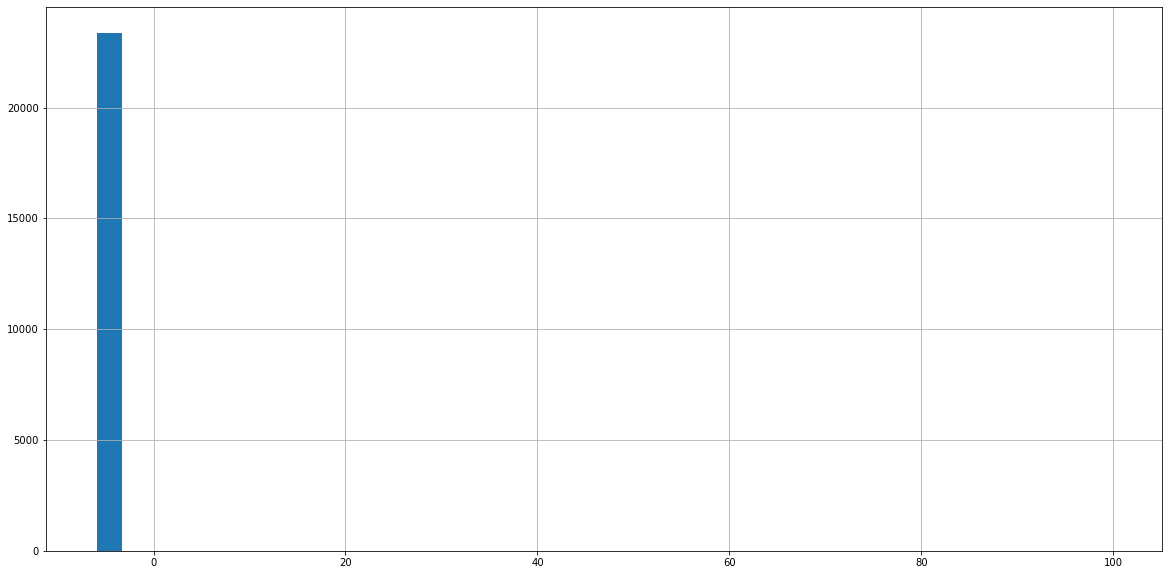

In [17]:
plt.figure(figsize=(20,10))
data1.loc[data1['HS3_G1']<100, 'HS3_G1'].hist(bins=40);
#this graph proves 0 is a good value

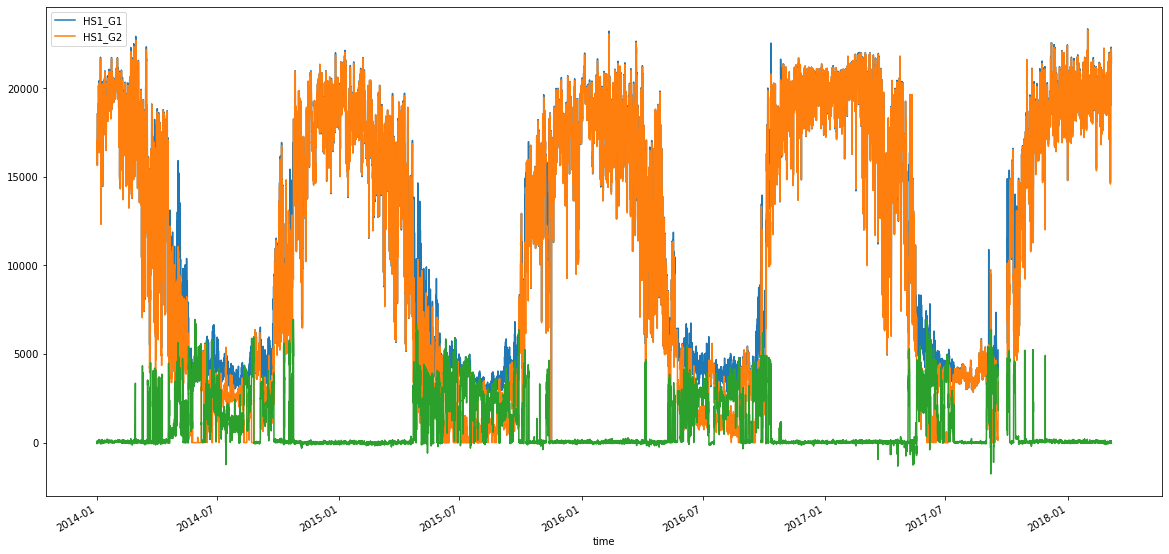

In [18]:
plt.figure(figsize=(20,10))
data1['HS1_G1'].plot();
plt.legend();
data1['HS1_G2'].plot();
plt.legend();
(data1['HS1_G1']-data1['HS1_G2']).plot();

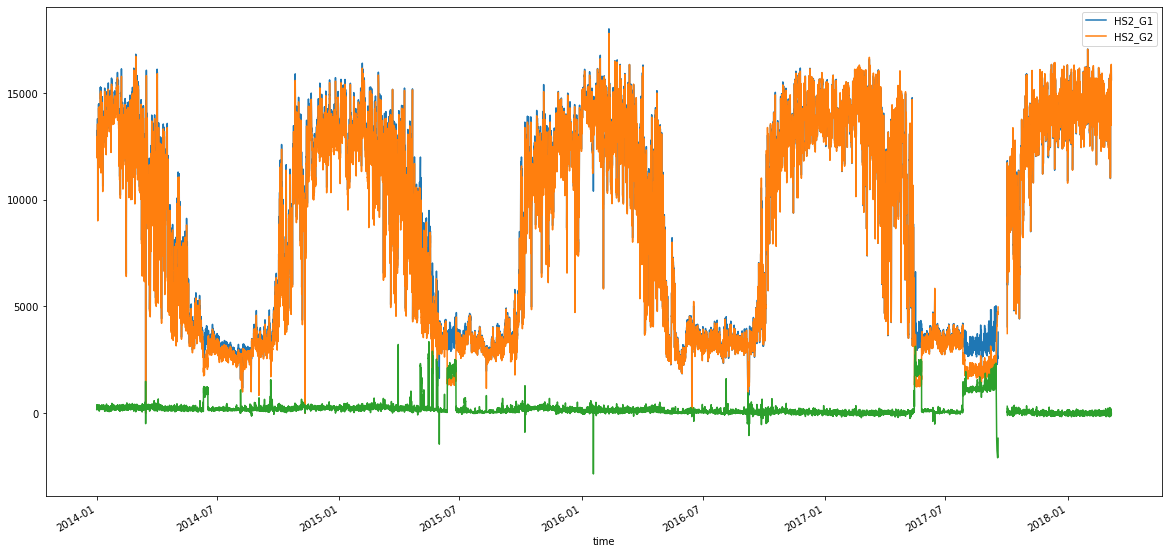

In [19]:
plt.figure(figsize=(20,10))
data1['HS2_G1'].plot();
plt.legend();
data1['HS2_G2'].plot();
plt.legend();
(data1['HS2_G1']-data1['HS2_G2']).plot();

In [20]:
#for hw, filter data! model needs to be "standard"
#find out best input for our model
corr_matrix = data.corr()
corr_matrix

,heat,HS1_G1,HS1_G2,HS1_P1,HS1_P2,HS1_T1,HS1_T2,HS2_G1,HS2_G2,HS2_P1,HS2_P2,HS2_T1,HS2_T2,HS3_G1,node1_T1,node2_T1,node3_T1
heat,1.000000,0.944934,0.936730,0.929986,0.309365,0.730308,0.352518,0.936750,0.934329,0.886666,-0.107649,0.729875,0.428694,0.554727,0.916558,0.917033,0.925304
HS1_G1,0.944934,1.000000,0.988048,0.955919,0.223065,0.594231,0.217470,0.986744,0.984557,0.922527,0.107083,0.576949,0.287348,0.391565,0.800580,0.773642,0.791488
HS1_G2,0.936730,0.988048,1.000000,0.947589,0.238484,0.596641,0.205439,0.975430,0.972887,0.920837,0.087114,0.579575,0.278596,0.388590,0.799283,0.768267,0.789177
HS1_P1,0.929986,0.955919,0.947589,1.000000,0.224413,0.610512,0.213433,0.962550,0.962448,0.968240,0.078837,0.607107,0.278886,0.393029,0.811955,0.786947,0.800651
HS1_P2,0.309365,0.223065,0.238484,0.224413,1.000000,0.112393,-0.010061,0.255933,0.246157,0.227945,-0.035422,0.124427,-0.026651,0.164507,0.295797,0.221898,0.258697
HS1_T1,0.730308,0.594231,0.596641,0.610512,0.112393,1.000000,0.656401,0.587010,0.581686,0.591549,-0.028163,0.817727,0.625416,0.535723,0.783916,0.823640,0.807909
HS1_T2,0.352518,0.217470,0.205439,0.213433,-0.010061,0.656401,1.000000,0.193816,0.196001,0.233799,0.004933,0.621616,0.748760,0.490527,0.462238,0.517307,0.496814
HS2_G1,0.936750,0.986744,0.975430,0.962550,0.255933,0.587010,0.193816,1.000000,0.997256,0.934271,0.112797,0.558852,0.263715,0.370897,0.791345,0.765150,0.781772
HS2_G2,0.934329,0.984557,0.972887,0.962448,0.246157,0.581686,0.196001,0.997256,1.000000,0.931190,0.120612,0.558709,0.266262,0.367964,0.787346,0.762899,0.778696
HS2_P1,0.886666,0.922527,0.920837,0.968240,0.227945,0.591549,0.233799,0.934271,0.931190,1.000000,0.087463,0.659140,0.343207,0.390539,0.769157,0.730701,0.754603


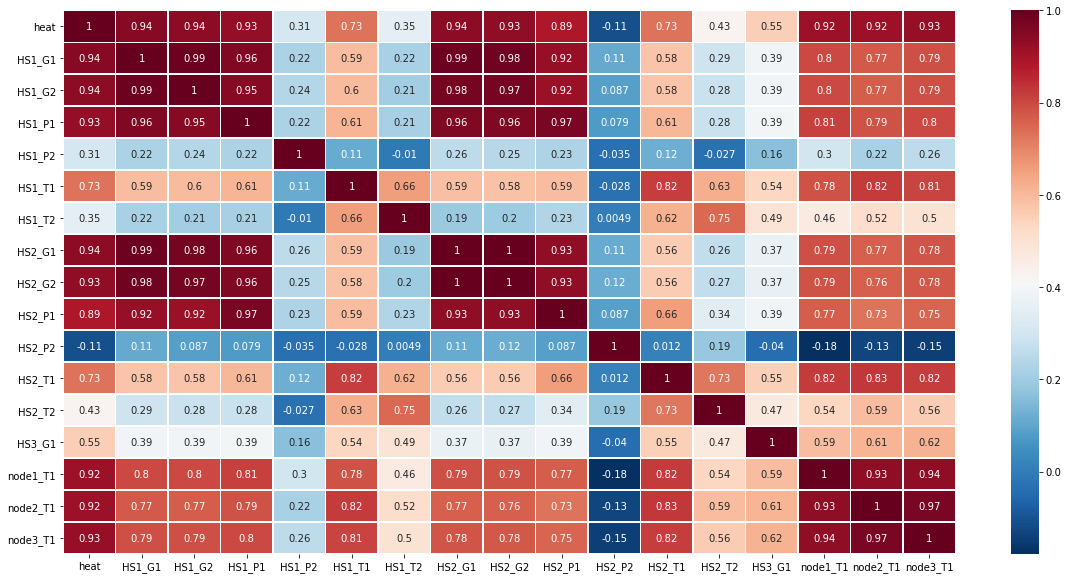

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns,cmap='RdBu_r',
            annot=True,linewidth=0.5);

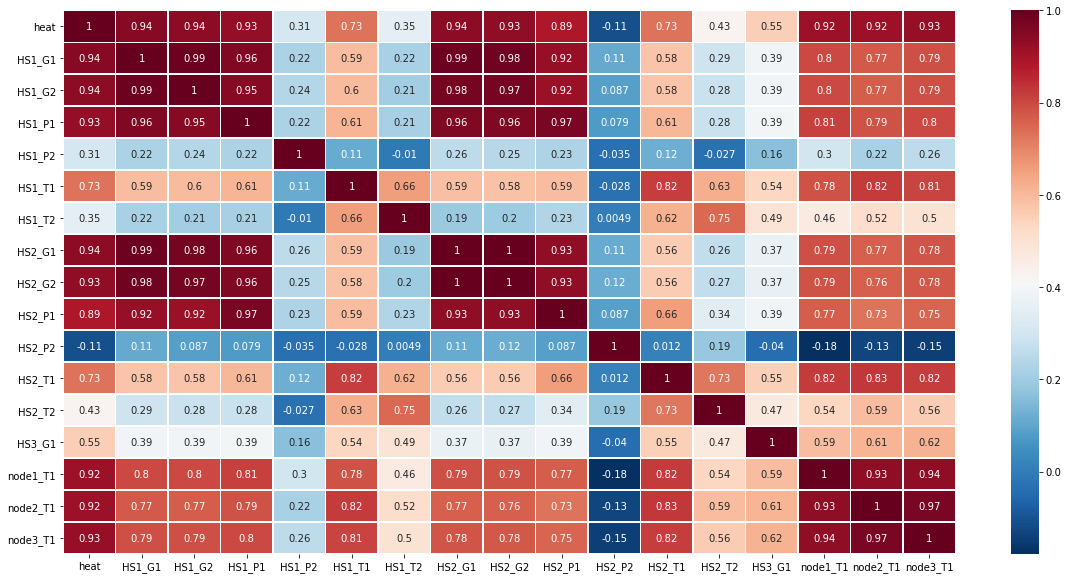

In [22]:
#method with monotomy
data.corr(method='spearman')
corr_matrix2 = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix2, xticklabels=corr_matrix2.columns, 
            yticklabels=corr_matrix2.columns,cmap='RdBu_r',
            annot=True,linewidth=0.5);

In [23]:
#use time-delays for temperature
#use a recursive method also
for Delay in range(1,24):
    data["HS1_T1_del_"+str(Delay)]=pd.concat(
        [pd.DataFrame([{data[["HS1_T1"]].columns[0]: np.nan} for i in range(0,Delay)]),
                                    data[["HS1_T1"]]], axis = 0).drop(data["HS1_T1"].tail(Delay).index).values

In [25]:
data.head(25)

,heat,HS1_G1,HS1_G2,HS1_P1,HS1_P2,HS1_T1,HS1_T2,HS2_G1,HS2_G2,HS2_P1,...,HS1_T1_del_14,HS1_T1_del_15,HS1_T1_del_16,HS1_T1_del_17,HS1_T1_del_18,HS1_T1_del_19,HS1_T1_del_20,HS1_T1_del_21,HS1_T1_del_22,HS1_T1_del_23
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 05:00:00,NaN,16447.303810,16399.325036,1.279833,0.153203,84.859847,39.317780,12171.048344,12012.080217,1.253798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 06:00:00,NaN,16537.577143,16480.791703,1.279560,0.153752,85.096274,39.541879,12218.668968,12064.554652,1.254026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 07:00:00,NaN,16445.183810,16406.698370,1.270589,0.156398,85.401233,39.774837,12226.214704,12057.511458,1.253057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 08:00:00,NaN,16362.103810,16285.131703,1.241578,0.156026,83.321207,39.888996,12144.042325,11968.129992,1.224238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 09:00:00,NaN,15919.877143,15984.451703,1.173625,0.183111,82.149928,39.821501,12464.727244,12090.588058,1.216398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.corr()

,heat,HS1_G1,HS1_G2,HS1_P1,HS1_P2,HS1_T1,HS1_T2,HS2_G1,HS2_G2,HS2_P1,...,HS1_T1_del_14,HS1_T1_del_15,HS1_T1_del_16,HS1_T1_del_17,HS1_T1_del_18,HS1_T1_del_19,HS1_T1_del_20,HS1_T1_del_21,HS1_T1_del_22,HS1_T1_del_23
heat,1.000000,0.944934,0.936730,0.929986,0.309365,0.730308,0.352518,0.936750,0.934329,0.886666,...,0.725620,0.725166,0.724524,0.723643,0.722438,0.720989,0.719406,0.717893,0.716576,0.715417
HS1_G1,0.944934,1.000000,0.988048,0.955919,0.223065,0.594231,0.217470,0.986744,0.984557,0.922527,...,0.609812,0.612491,0.614638,0.616320,0.617551,0.618273,0.618557,0.618381,0.617734,0.616691
HS1_G2,0.936730,0.988048,1.000000,0.947589,0.238484,0.596641,0.205439,0.975430,0.972887,0.920837,...,0.608886,0.611201,0.613021,0.614477,0.615532,0.616209,0.616487,0.616386,0.615913,0.615098
HS1_P1,0.929986,0.955919,0.947589,1.000000,0.224413,0.610512,0.213433,0.962550,0.962448,0.968240,...,0.605763,0.607733,0.609656,0.611438,0.613096,0.614574,0.615796,0.616684,0.617263,0.617585
HS1_P2,0.309365,0.223065,0.238484,0.224413,1.000000,0.112393,-0.010061,0.255933,0.246157,0.227945,...,0.103704,0.103090,0.102549,0.102824,0.103800,0.104486,0.105095,0.105501,0.105395,0.104967
HS1_T1,0.730308,0.594231,0.596641,0.610512,0.112393,1.000000,0.656401,0.587010,0.581686,0.591549,...,0.845142,0.843228,0.842487,0.842470,0.843061,0.844281,0.845428,0.846576,0.847446,0.848708
HS1_T2,0.352518,0.217470,0.205439,0.213433,-0.010061,0.656401,1.000000,0.193816,0.196001,0.233799,...,0.547751,0.544700,0.543248,0.543559,0.545810,0.549899,0.556071,0.563853,0.573084,0.580725
HS2_G1,0.936750,0.986744,0.975430,0.962550,0.255933,0.587010,0.193816,1.000000,0.997256,0.934271,...,0.601714,0.604244,0.606260,0.607834,0.608949,0.609569,0.609835,0.609648,0.608864,0.607743
HS2_G2,0.934329,0.984557,0.972887,0.962448,0.246157,0.581686,0.196001,0.997256,1.000000,0.931190,...,0.595040,0.597679,0.599800,0.601494,0.602772,0.603550,0.603947,0.603892,0.603226,0.602182
HS2_P1,0.886666,0.922527,0.920837,0.968240,0.227945,0.591549,0.233799,0.934271,0.931190,1.000000,...,0.581965,0.583589,0.585331,0.586964,0.588443,0.589757,0.590880,0.591888,0.592608,0.593226


In [28]:
data.columns

Index(['heat', 'HS1_G1', 'HS1_G2', 'HS1_P1', 'HS1_P2', 'HS1_T1', 'HS1_T2',
       'HS2_G1', 'HS2_G2', 'HS2_P1', 'HS2_P2', 'HS2_T1', 'HS2_T2', 'HS3_G1',
       'node1_T1', 'node2_T1', 'node3_T1', 'HS1_T1_del_1', 'HS1_T1_del_2',
       'HS1_T1_del_3', 'HS1_T1_del_4', 'HS1_T1_del_5', 'HS1_T1_del_6',
       'HS1_T1_del_7', 'HS1_T1_del_8', 'HS1_T1_del_9', 'HS1_T1_del_10',
       'HS1_T1_del_11', 'HS1_T1_del_12', 'HS1_T1_del_13', 'HS1_T1_del_14',
       'HS1_T1_del_15', 'HS1_T1_del_16', 'HS1_T1_del_17', 'HS1_T1_del_18',
       'HS1_T1_del_19', 'HS1_T1_del_20', 'HS1_T1_del_21', 'HS1_T1_del_22',
       'HS1_T1_del_23'],
      dtype='object')

In [27]:
data.corr()['node1_T1']

heat             0.916558
HS1_G1           0.800580
HS1_G2           0.799283
HS1_P1           0.811955
HS1_P2           0.295797
HS1_T1           0.783916
HS1_T2           0.462238
HS2_G1           0.791345
HS2_G2           0.787346
HS2_P1           0.769157
HS2_P2          -0.178445
HS2_T1           0.823623
HS2_T2           0.539173
HS3_G1           0.590584
node1_T1         1.000000
node2_T1         0.934382
node3_T1         0.935483
HS1_T1_del_1     0.788399
HS1_T1_del_2     0.791889
HS1_T1_del_3     0.794072
HS1_T1_del_4     0.793780
HS1_T1_del_5     0.791192
HS1_T1_del_6     0.787067
HS1_T1_del_7     0.781643
HS1_T1_del_8     0.775652
HS1_T1_del_9     0.769590
HS1_T1_del_10    0.763519
HS1_T1_del_11    0.757634
HS1_T1_del_12    0.751981
HS1_T1_del_13    0.747117
HS1_T1_del_14    0.743197
HS1_T1_del_15    0.739994
HS1_T1_del_16    0.737514
HS1_T1_del_17    0.735959
HS1_T1_del_18    0.735008
HS1_T1_del_19    0.734644
HS1_T1_del_20    0.734848
HS1_T1_del_21    0.735583
HS1_T1_del_2

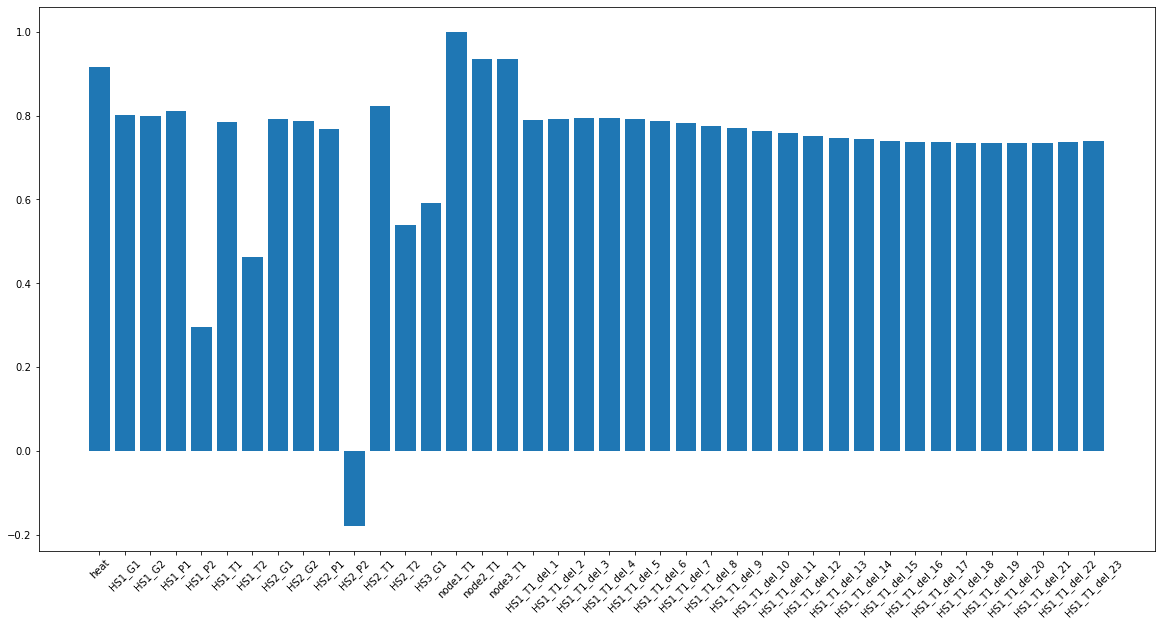

In [34]:
plt.figure(figsize=(20,10))
plt.bar(data.columns, data.corr()['node1_T1'].values);
plt.xticks(rotation=45);
plt.plot();
#the highest are the worst, build model for optimizer
#supply temperature in the heating plant is a good parameter, just choose one delay

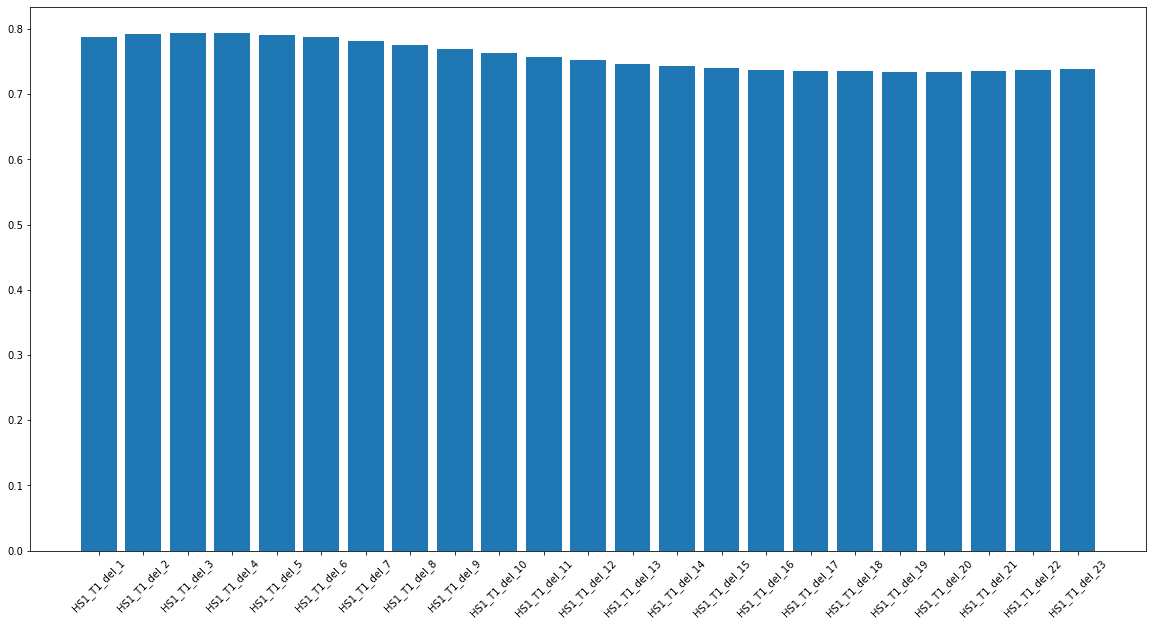

In [35]:
#x-axis delays are on hours, ex: del_1 = 1 hour
#divide data by season
plt.figure(figsize=(20,10))
plt.bar(data.columns[17:], data.corr()['node1_T1'].values[17:]);
plt.xticks(rotation=45);
plt.plot();

In [ ]:
#recursive method, building models and selecting different features
#For summer and winter the input can vary; maybe for winter delayed more as its slower
#use linear regression to build the model, search linear regression sklearn and show accuracy of the model
#r^2, plot model output and history
#drop non-values
#use only one value of delay, dont use multiple delayed values
#important inputs: heat and supply temperature of the heating plant
#select node1 or 2 or 3

NameError: name 'sub1' is not defined